In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
import umap.umap_ as umap


c:\Users\ashfa\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load a high-dimensional dataset (e.g., handwritten digits: 64D)
data = load_digits()
X = data.data
y = data.target


In [3]:
# Dimensionality Reduction Methods 

# 1. t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# 2. LLE (Locally Linear Embedding)
lle = LocallyLinearEmbedding(n_neighbors=30, n_components=2, random_state=42)
X_lle = lle.fit_transform(X)

# 3. UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# 4. Isomap
isomap = Isomap(n_neighbors=30, n_components=2)
X_isomap = isomap.fit_transform(X)



c:\Users\ashfa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ashfa\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


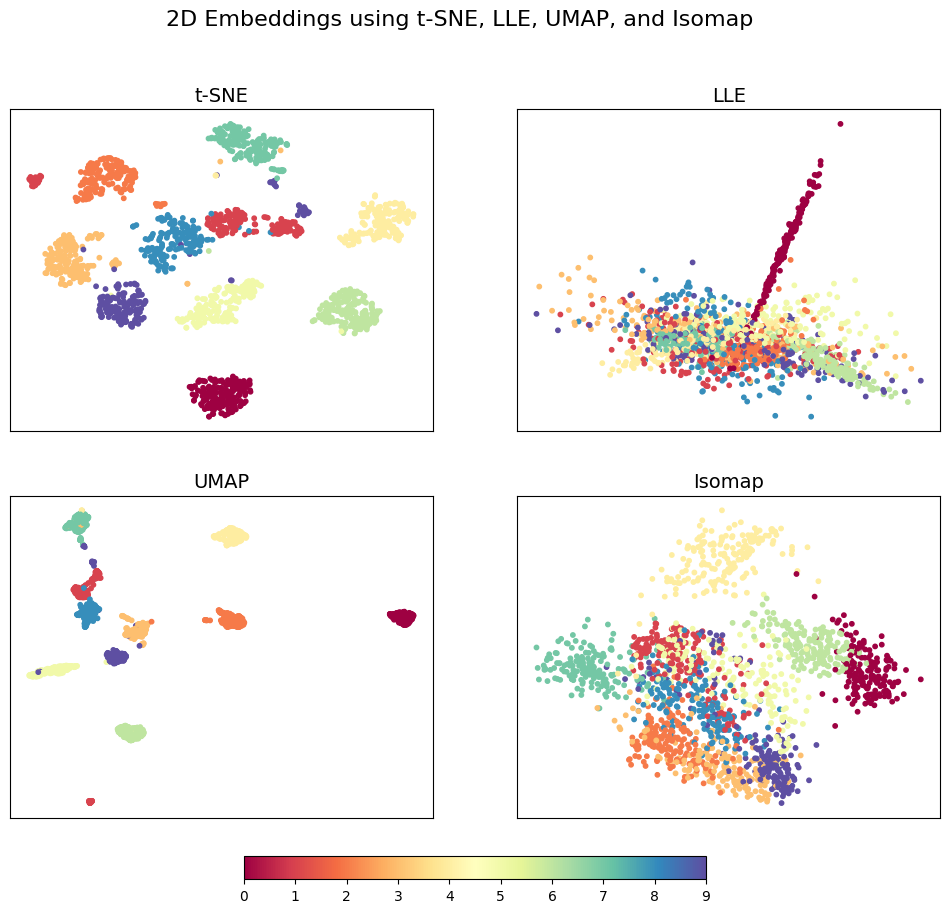

In [4]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
methods = ['t-SNE', 'LLE', 'UMAP', 'Isomap']
embeddings = [X_tsne, X_lle, X_umap, X_isomap]

for ax, method, emb in zip(axes.flat, methods, embeddings):
    scatter = ax.scatter(emb[:, 0], emb[:, 1], c=y, cmap='Spectral', s=10)
    ax.set_title(method, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

plt.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.03, pad=0.05)
plt.suptitle("2D Embeddings using t-SNE, LLE, UMAP, and Isomap", fontsize=16)
plt.show()